# Lab #4

**Q1. Write a function to create x and y values that follows the given function
above. Provide initial plot of the function.**

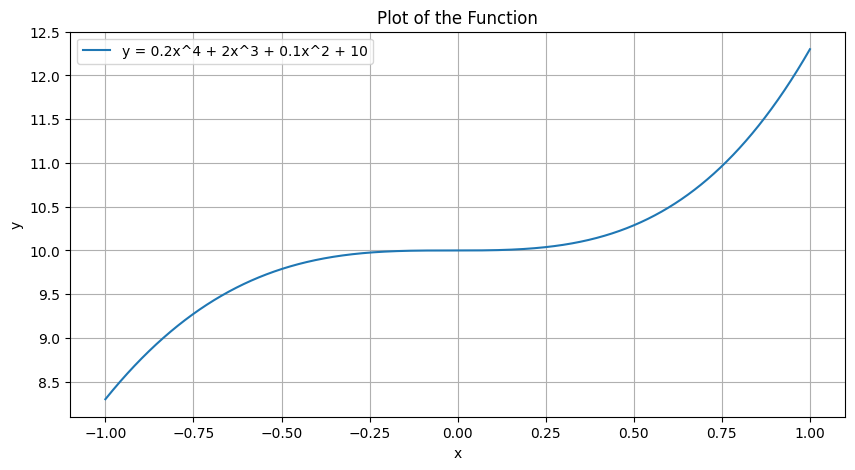

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to create the y values based on the given equation
def function_y(x):
    return 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10

# Create 30,000 samples for x in the range [-1, 1]
x_values = np.linspace(-1, 1, 30000)
# Generate the associated y values
y_values = function_y(x_values)

# Plotting the function
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values, label='y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


**Q2. Write a function that accepts an argument to indicate shuffling. Based on the argument, function has to return the shuffled data or data without shuffling.**

In [34]:
def get_dataset(shuffle=False):
    # Generate dataset
    x_data = np.random.uniform(-1, 1, 30000)
    y_data = 0.2*x_data**4 + 2*x_data**3 + 0.1*x_data**2 + 10
    data = np.column_stack((x_data, y_data))

    # Shuffle the data if the argument is True
    if shuffle:
        np.random.shuffle(data)

    return data

# Example usage of the function
dataset_shuffled = get_dataset(shuffle=True)

# Print the first 5 rows of the dataset to verify
print("First 5 rows of the shuffled dataset:")
print(dataset_shuffled[:5])


First 5 rows of the shuffled dataset:
[[ 0.33393592 10.08811488]
 [-0.0419896  10.00002887]
 [-0.41813533  9.87738614]
 [-0.18845865  9.99041711]
 [-0.1268596   9.99757794]]


**Q3: Code to write a function to split the data into train, validation, and test sets and to scale the data between 0 and 1.**

In [35]:
# Revisiting Q3: Code to split and scale the data, with added print statements for verification

# Regenerate the dataset
def get_dataset(shuffle=False):
    # Generate dataset
    x_data = np.random.uniform(-1, 1, 30000)
    y_data = 0.2*x_data**4 + 2*x_data**3 + 0.1*x_data**2 + 10
    data = np.column_stack((x_data, y_data))

    # Shuffle the data if the argument is True
    if shuffle:
        np.random.shuffle(data)

    return data

# Create the dataset without shuffling for the splitting and scaling process
dataset = get_dataset(shuffle=False)

# Now we can split and scale the dataset
train_scaled, validation_scaled, test_scaled = split_and_scale_data(dataset)

def split_and_scale_data(data, train_size=0.7, validation_size=0.15, test_size=0.15):
    if (train_size + validation_size + test_size) != 1.0:
        raise ValueError("Train, validation, and test sizes must sum up to 1.")

    # Split data
    train_data, test_data = train_test_split(data, train_size=train_size, random_state=42)
    validation_data, test_data = train_test_split(test_data, train_size=validation_size / (validation_size + test_size), random_state=42)

    # Scale data
    scaler = MinMaxScaler()
    scaler.fit(train_data)
    train_scaled = scaler.transform(train_data)
    validation_scaled = scaler.transform(validation_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, validation_scaled, test_scaled

# Example usage of the function
train_scaled, validation_scaled, test_scaled = split_and_scale_data(dataset)

# Verification by printing out shapes and sample values
print("Shapes of the split data:")
print("Train Data Shape:", train_scaled.shape)
print("Validation Data Shape:", validation_scaled.shape)
print("Test Data Shape:", test_scaled.shape)

print("\nSample scaled train data (first 5 rows):")
print(train_scaled[:5])

print("\nSample scaled validation data (first 5 rows):")
print(validation_scaled[:5])

print("\nSample scaled test data (first 5 rows):")
print(test_scaled[:5])



Shapes of the split data:
Train Data Shape: (21000, 2)
Validation Data Shape: (4500, 2)
Test Data Shape: (4500, 2)

Sample scaled train data (first 5 rows):
[[0.05139863 0.11641652]
 [0.55991441 0.42625096]
 [0.06786981 0.14879861]
 [0.36413209 0.41710666]
 [0.06160245 0.13674878]]

Sample scaled validation data (first 5 rows):
[[0.12136592 0.23865981]
 [0.64187338 0.43877956]
 [0.79567845 0.54327166]
 [0.10073703 0.20669211]
 [0.16621192 0.29733004]]

Sample scaled test data (first 5 rows):
[[0.25148736 0.37285344]
 [0.51519246 0.42505882]
 [0.09056328 0.18970493]
 [0.22747152 0.35589193]
 [0.66259913 0.44541816]]


**Q4) function that accepts actual target and predicted values to calculate mean absolute error (MAE), mean square error(MSE), root mean square error (RMSE), and r2 score**


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(actual, predicted)
    return mae, mse, rmse, r2

# Example usage of the function with dummy data
actual_values = np.array([3, -0.5, 2, 7])
predicted_values = np.array([2.5, 0.0, 2, 8])

mae, mse, rmse, r2 = calculate_metrics(actual_values, predicted_values)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
R^2 Score: 0.9486081370449679


**Q5) implement neural network of two different structures and using different
hyper-parameters.**

Case 1: Shuffled and Unscaled Data with Structure 1 and ReLU Activation


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define neural network structure 1
model1 = Sequential([
    Dense(12, input_dim=1, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse')

# Assume `dataset` is your shuffled and unscaled data
# Split the data into inputs (X) and outputs (y)
X = dataset[:, 0]
y = dataset[:, 1]

# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=2/3, random_state=42)

# Reshape for Keras expectations
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Train the model
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12)


Epoch 1/20
750/750 [==============================] - 4s 3ms/step - loss: 19.9820 - val_loss: 0.1892
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1096 - val_loss: 0.0726
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0590 - val_loss: 0.0515
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0398 - val_loss: 0.0307
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0217 - val_loss: 0.0147
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 0.0075
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0035 - val_loss: 0.003

Case 2: Shuffled and Unscaled Data with Structure 2 and ReLU Activation


In [38]:
# Define neural network structure 2
model2 = Sequential([
    Dense(24, input_dim=1, activation='relu'),
    Dense(1)
])

model2.compile(optimizer='adam', loss='mse')

# Train the model
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12)


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 33.3171 - val_loss: 0.1831
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1380 - val_loss: 0.1111
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0895 - val_loss: 0.0742
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0611 - val_loss: 0.0529
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0474 - val_loss: 0.0445
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0404 - val_loss: 0.0373
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0313 - val_loss: 0.0268
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0216 - val_loss: 0.0182
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0143 - val_loss: 0.0122
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0102 - val_loss: 0.008

Case 3: Shuffled and Unscaled Data with Structure 1 and Tanh Activation


In [39]:
# Define neural network structure 1 with tanh activation
model3 = Sequential([
    Dense(12, input_dim=1, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse')

# Train the model
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12)


Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 47.7664 - val_loss: 22.8623
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 12.5608 - val_loss: 5.5414
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 2.7597 - val_loss: 1.1702
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.7706 - val_loss: 0.6129
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5651 - val_loss: 0.3678
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2959 - val_loss: 0.2422
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2020 - val_loss: 0.1771
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1352 - val_loss: 0.0835
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0491 - val_loss: 0.0287
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0183 - val_loss: 0.0

Case 4: Shuffled and Scaled Data with Structure 1 and ReLU Activation


In [40]:
# Scale your data (assuming 'dataset' is already shuffled)
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)
X_scaled = dataset_scaled[:, 0]
y_scaled = dataset_scaled[:, 1]

# Split the scaled data (reshape for Keras if needed, like before)
X_train_scaled, X_val_test_scaled, y_train_scaled, y_val_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.7, random_state=42)
X_val_scaled, X_test_scaled, y_val_scaled, y_test_scaled = train_test_split(X_val_test_scaled, y_val_test_scaled, test_size=2/3, random_state=42)

# Reshape for Keras expectations
X_train_scaled = X_train_scaled.reshape(-1, 1)
X_val_scaled = X_val_scaled.reshape(-1, 1)
X_test_scaled = X_test_scaled.reshape(-1, 1)

# Train the model using the scaled data
model1.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=20, batch_size=12)


Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 1.2592 - val_loss: 0.0103
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0024 - val_loss: 0.0023

**Q6) XOR problem by using a neural network. Design your neural network by assuming all required parameters, such as the number of layers, activation functions, loss function, etc. Present your work to classify the given truth table with sufficient details.**

In [41]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the mean squared error loss function and its derivative
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred)

# Initialize the XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Set the random seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1

# Two layers: one hidden layer and one output layer
weights_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.random.rand(hidden_size)
weights_output = np.random.rand(hidden_size, output_size)
bias_output = np.random.rand(output_size)

# Learning rate
lr = 0.1

# Training the network
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate the loss
    loss = mse_loss(y, predicted_output)

    # Backpropagation
    d_predicted_output = mse_loss_derivative(y, predicted_output) * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_output -= hidden_layer_output.T.dot(d_predicted_output) * lr
    bias_output -= np.sum(d_predicted_output, axis=0) * lr
    weights_hidden -= X.T.dot(d_hidden_layer) * lr
    bias_hidden -= np.sum(d_hidden_layer, axis=0) * lr

    # Print the loss over time
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Print final weights and biases
print("Final hidden weights: ", weights_hidden)
print("Final hidden bias: ", bias_hidden)
print("Final output weights: ", weights_output)
print("Final output bias: ", bias_output)

# Predictions after training
hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print("Predicted output: ", predicted_output)


Epoch 0, Loss: 0.3246585814644244
Epoch 1000, Loss: 0.19610214801867648
Epoch 2000, Loss: 0.03050623886685588
Epoch 3000, Loss: 0.007370695897268731
Epoch 4000, Loss: 0.0038472606418112334
Epoch 5000, Loss: 0.0025457917159948497
Epoch 6000, Loss: 0.0018843385580302465
Epoch 7000, Loss: 0.001488189833062081
Epoch 8000, Loss: 0.0012259217453827042
Epoch 9000, Loss: 0.0010401476400889495
Final hidden weights:  [[4.19845799 6.14084348]
 [4.20470856 6.16792486]]
Final hidden bias:  [-6.45014    -2.68115852]
Final output weights:  [[-9.29769517]
 [ 8.59695967]]
Final output bias:  [-3.92750676]
Predicted output:  [[0.03257287]
 [0.97136294]
 [0.97131353]
 [0.03006655]]
